In [13]:
# Import Required Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 60)

In [14]:
# Classification Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifier

from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

In [15]:
# Encoding
from sklearn.preprocessing import OrdinalEncoder

# Hyperparameter tunning
from sklearn.model_selection import GridSearchCV

# OverSampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [16]:
import pickle
import joblib

In [17]:
df = pd.read_csv(r'src\final_dataset.csv')
df.columns = [col.lower() for col in df.columns]
df

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,email_domain,phone_number,billing_city,billing_postal,billing_state,card_bin,currency,cvv,signature_image,transaction_type,transaction_env,applicant_name,billing_address,merchant_id,tranaction_initiate,days_since_last_logon,inital_amount,event_label,event_year,event_month,event_day,event_weekday,event_time_hour,event_time_minutes,browser,operating_system,search_engine,security_level,region,language,network_id,network_id_prefix,host_id,host_id_prefix
0,3371.0,2167.0,56.0,2572.0,perez-garza.com,8781115140,Woodsburgh,96336.0,California,40771.0,cad,D,F,U,X,Linda Wright,4684 Sharon Ranch,066-82-8795,O,59.0,13646.0,legit,2020,12,29,1,9,5,Opera,Windows,Presto,0,NZ,Niuean,154,68,49,124
1,2714.0,2045.0,48.0,4517.0,mcneil-ortega.com,27360139,West Kevin,78083.0,Florida,24480.0,cad,X,X,H,W,Terri Rivera,7642 Allison Ramp,669-99-9459,J,0.0,11930.0,legit,2021,6,22,1,18,5,Opera,Linux,Presto,0,IN,Apatani,39,131,125,85
2,6987.0,2892.0,61.0,5007.0,davis-calderon.com,9835852863,Lorichester,83236.0,Utah,37778.0,cad,X,Q,X,X,Sarah Gray,4948 Lisa Passage,086-41-1624,T,83.0,7412.0,legit,2021,5,10,0,13,48,Mozilla,Linux,Gecko,0,MV,Dhivehi,166,245,194,83
3,2712.0,3040.0,28.0,6022.0,rose-lee.org,6788973420,Stephenmouth,78364.0,Virginia,55790.0,usd,G,G,C,N,Valerie Jenkins,1616 Little Camp,669-97-4021,M,24.0,4623.0,legit,2021,3,11,3,7,36,Mozilla,Macintosh,AppleWebKit,0,ER,Bilen,100,1,217,216
4,3598.0,2976.0,66.0,2600.0,nash.net,132041766,New Brianmouth,77499.0,South Carolina,37370.0,cad,X,F,F,G,Amy Coleman,149 Harris Rapid,088-21-6329,K,21.0,1905.0,legit,2021,3,27,5,6,13,Mozilla,Linux,Gecko,0,NP,Chitwania Tharu,113,156,65,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146995,3986.0,2890.0,57.0,4544.0,garza-harper.org,5540099294,West Tara,34817.0,Washington,30017.0,cad,W,D,S,W,Heather Burke,63652 Kimberly Islands Apt. 674,330-78-4517,M,99.0,6681.0,legit,2020,11,20,4,16,34,Mozilla,Windows,Trident,0,US,Yiddish,92,98,51,182
146996,5834.0,1875.0,61.0,4369.0,henderson-rivas.com,1754778512,New Sarafurt,35879.0,Indiana,65507.0,cad,I,X,W,Z,Pamela Hunter,007 Chavez Bypass Suite 092,867-31-4925,I,85.0,2402.0,legit,2021,3,31,2,1,40,Mozilla,Linux,Gecko,0,ER,Tigrinya,137,17,200,201
146997,4781.0,3371.0,48.0,5135.0,larsen-wright.com,2273743408,Priceburgh,84167.0,Illinois,47079.0,cad,D,H,I,D,Julie Evans,76186 Anderson Ridge,120-07-6784,G,22.0,4113.0,legit,2021,1,17,6,8,51,Mozilla,Macintosh,Gecko,0,BE,Walloon,97,11,159,151
146998,6085.0,2306.0,59.0,4846.0,hughes-chen.com,1196028479,Rogersbury,80391.0,Oklahoma,25891.0,cad,X,U,Z,X,Joseph Hunt,7328 Wood Inlet,346-52-6342,W,70.0,4531.0,legit,2021,1,17,6,5,17,Mozilla,iPhone,AppleWebKit,0,KZ,Kazakh,88,43,40,52


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147000 entries, 0 to 146999
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       147000 non-null  float64
 1   transaction_amt        147000 non-null  float64
 2   transaction_adj_amt    147000 non-null  float64
 3   historic_velocity      147000 non-null  float64
 4   email_domain           147000 non-null  object 
 5   phone_number           147000 non-null  int64  
 6   billing_city           147000 non-null  object 
 7   billing_postal         147000 non-null  float64
 8   billing_state          147000 non-null  object 
 9   card_bin               147000 non-null  float64
 10  currency               147000 non-null  object 
 11  cvv                    147000 non-null  object 
 12  signature_image        147000 non-null  object 
 13  transaction_type       147000 non-null  object 
 14  transaction_env        147000 non-nu

In [19]:
df.dropna(axis=0, inplace= True)

In [20]:
df.shape

(147000, 38)

# Converting Categorical data into Numerical data.

In [21]:
df.select_dtypes(include = 'object')

,email_domain,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,applicant_name,billing_address,merchant_id,tranaction_initiate,event_label,browser,operating_system,search_engine,region,language
0,perez-garza.com,Woodsburgh,California,cad,D,F,U,X,Linda Wright,4684 Sharon Ranch,066-82-8795,O,legit,Opera,Windows,Presto,NZ,Niuean
1,mcneil-ortega.com,West Kevin,Florida,cad,X,X,H,W,Terri Rivera,7642 Allison Ramp,669-99-9459,J,legit,Opera,Linux,Presto,IN,Apatani
2,davis-calderon.com,Lorichester,Utah,cad,X,Q,X,X,Sarah Gray,4948 Lisa Passage,086-41-1624,T,legit,Mozilla,Linux,Gecko,MV,Dhivehi
3,rose-lee.org,Stephenmouth,Virginia,usd,G,G,C,N,Valerie Jenkins,1616 Little Camp,669-97-4021,M,legit,Mozilla,Macintosh,AppleWebKit,ER,Bilen
4,nash.net,New Brianmouth,South Carolina,cad,X,F,F,G,Amy Coleman,149 Harris Rapid,088-21-6329,K,legit,Mozilla,Linux,Gecko,NP,Chitwania Tharu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146995,garza-harper.org,West Tara,Washington,cad,W,D,S,W,Heather Burke,63652 Kimberly Islands Apt. 674,330-78-4517,M,legit,Mozilla,Windows,Trident,US,Yiddish
146996,henderson-rivas.com,New Sarafurt,Indiana,cad,I,X,W,Z,Pamela Hunter,007 Chavez Bypass Suite 092,867-31-4925,I,legit,Mozilla,Linux,Gecko,ER,Tigrinya
146997,larsen-wright.com,Priceburgh,Illinois,cad,D,H,I,D,Julie Evans,76186 Anderson Ridge,120-07-6784,G,legit,Mozilla,Macintosh,Gecko,BE,Walloon
146998,hughes-chen.com,Rogersbury,Oklahoma,cad,X,U,Z,X,Joseph Hunt,7328 Wood Inlet,346-52-6342,W,legit,Mozilla,iPhone,AppleWebKit,KZ,Kazakh


In [22]:
enc=OrdinalEncoder()

# Specify categorical column names for ordinal encoding
column_names = df.select_dtypes(include = 'object').columns

# Dictionary to store unique values before and after ordinal encoding
unique_value ={}
for col_name in column_names:
    data = df[col_name].unique()
    data.sort()

    df[col_name] = enc.fit_transform(df[[col_name]])

    globals()[col_name] = {}
    for i in df[col_name].unique():
        globals()[col_name][data[int(i)]] = i
        unique_value[f'{col_name}'] = globals()[col_name]
    
unique_value

{'email_domain': {'perez-garza.com': 4936.0,
  'mcneil-ortega.com': 4128.0,
  'davis-calderon.com': 1446.0,
  'rose-lee.org': 5568.0,
  'nash.net': 4556.0,
  'merritt-bolton.com': 4184.0,
  'hodge.com': 2821.0,
  'henderson-david.com': 2664.0,
  'espinoza-robinson.com': 1733.0,
  'frost-kidd.com': 2010.0,
  'williams-black.info': 6868.0,
  'richardson.com': 5322.0,
  'phillips-fernandez.com': 5027.0,
  'hubbard-ramirez.com': 2954.0,
  'tate.com': 6269.0,
  'davis.net': 1490.0,
  'anderson-williams.com': 140.0,
  'saunders-burton.info': 5734.0,
  'boyd-payne.com': 604.0,
  'stanley-hernandez.info': 6124.0,
  'dunn-gonzales.com': 1649.0,
  'berry.org': 502.0,
  'bowman-bonilla.net': 589.0,
  'byrd-daniel.com': 857.0,
  'anderson.com': 143.0,
  'ponce-kim.com': 5065.0,
  'rubio.com': 5604.0,
  'howard-holt.org': 2922.0,
  'anderson-carlson.com': 109.0,
  'price-jackson.info': 5136.0,
  'holden.biz': 2849.0,
  'long-richard.com': 3687.0,
  'joseph.com': 3314.0,
  'williams-powell.info': 69

In [23]:
import json
# Write the unique_value dictionary to a JSON file with proper indentation
with open(r'src/Category_Columns_Encoded_Data.json', 'w') as file:
    json.dump(unique_value, file , indent = 4)

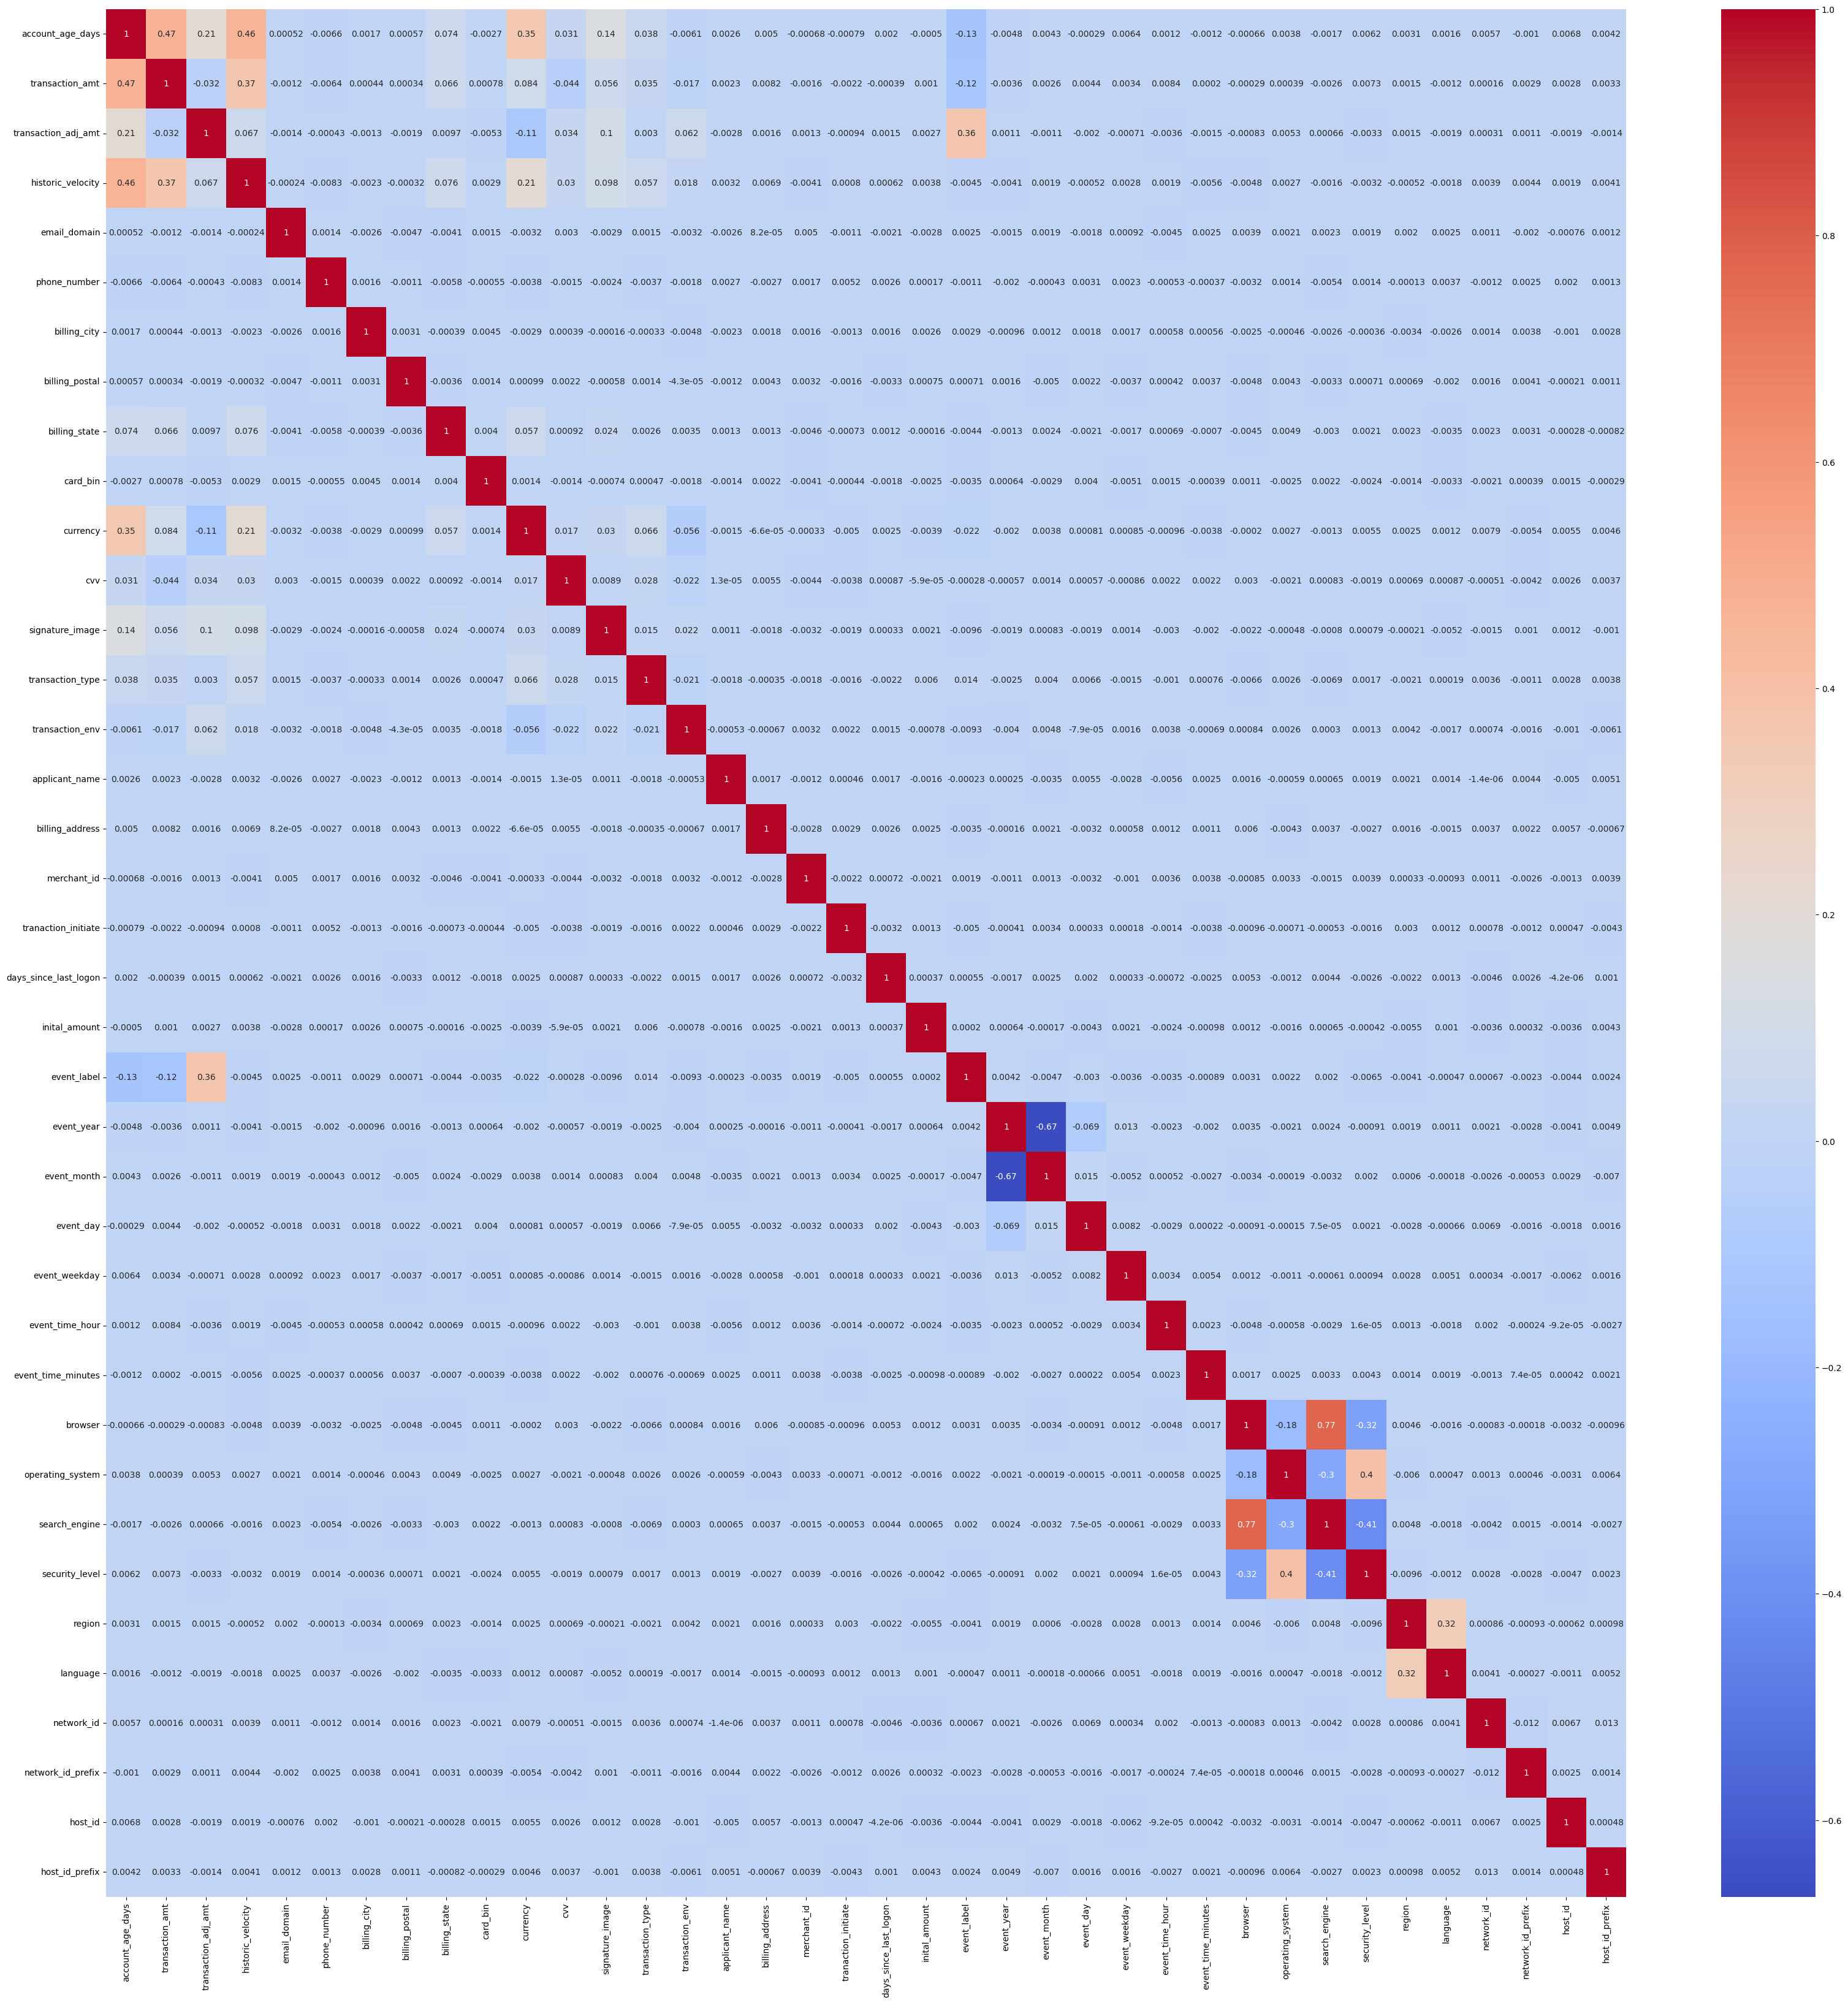

In [24]:
plt.figure(figsize=(40, 40))

sns.heatmap(data = df.corr(), annot=True, cmap = 'coolwarm')

plt.show()

### Handling Imbalance Dataset

In [25]:
df.event_label.value_counts()

event_label
1.0    138996
0.0      8004
Name: count, dtype: int64

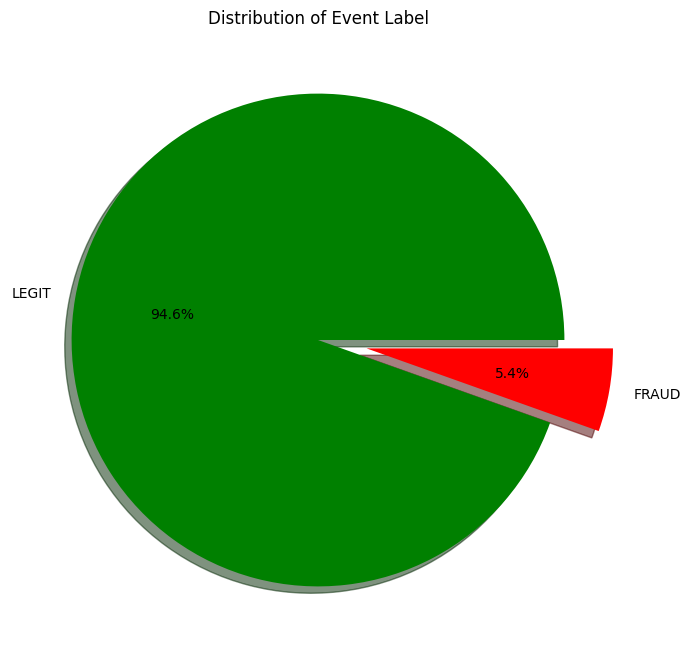

In [26]:
plt.figure(figsize= (8,8))
plt.pie(x = df['event_label'].value_counts(), labels=['LEGIT', 'FRAUD'], colors=['g', 'r'], explode = [0, 0.2 ], shadow = True, autopct='%1.1f%%')
plt.title('Distribution of Event Label')
plt.show()

###  Dataset Imbalance Analysis

- 5.4% of transactions are fraud transactions.
- Our dataset is imbalanced, with far fewer Legit compared to fraud.
- This imbalance can reduce the performance of a classification model, causing it to be biased towards the majority class (repayers).
- To address this, we will use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.


In [28]:
# Prepare your data
X = df.drop(columns=['event_label'])
y = df['event_label']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Original target distribution:", Counter(y_train))
print("Resampled target distribution:", Counter(y_train_resampled))

Original target distribution: Counter({1.0: 111152, 0.0: 6448})
Resampled target distribution: Counter({1.0: 111152, 0.0: 111152})


## Classification

In [29]:
def model_test(model_name):
    model = model_name()
    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_train_resampled)
    print('Training Scores \n\n')
    print('Training Dataset Accuracy : ', accuracy_score(y_pred, y_train_resampled))

    print("Train Dataset Classificatin Report : \n\n", classification_report(y_pred, y_train_resampled))

    y_pred = model.predict(X_test)

    print('Testing Scores \n\n')
    print('Test Dataset Confusion matrix \n\n:', confusion_matrix(y_test, y_pred))
    print('Test Dataset Accuracy : ', accuracy_score(y_pred, y_test))
    print("Test Dataset Classificatin Report : \n\n", classification_report(y_pred, y_test))

    return model

In [30]:
AdaBoost = model_test(AdaBoostClassifier)

Training Scores 


Training Dataset Accuracy :  0.9647149848855621
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96    110392
         1.0       0.97      0.96      0.96    111912

    accuracy                           0.96    222304
   macro avg       0.96      0.96      0.96    222304
weighted avg       0.96      0.96      0.96    222304

Testing Scores 


Test Dataset Confusion matrix 

: [[ 1050   506]
 [  895 26949]]
Test Dataset Accuracy :  0.9523469387755102
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       0.67      0.54      0.60      1945
         1.0       0.97      0.98      0.97     27455

    accuracy                           0.95     29400
   macro avg       0.82      0.76      0.79     29400
weighted avg       0.95      0.95      0.95     29400



In [31]:
fraud= df[df['event_label']==0]
print('Actual Event Lables value count :\n', df.event_label.value_counts())
result = AdaBoost.predict(df.drop('event_label', axis = 1))
print('Predicted values counts:', Counter(result))
result = AdaBoost.predict(fraud.drop('event_label', axis = 1))
print('Predicted values counts Fraud Data:', Counter(result))

Actual Event Lables value count :
 event_label
1.0    138996
0.0      8004
Name: count, dtype: int64
Predicted values counts: Counter({1.0: 137145, 0.0: 9855})
Predicted values counts Fraud Data: Counter({0.0: 5418, 1.0: 2586})


In [32]:
RandomForest = model_test(RandomForestClassifier)

Training Scores 


Training Dataset Accuracy :  1.0
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    111152
         1.0       1.00      1.00      1.00    111152

    accuracy                           1.00    222304
   macro avg       1.00      1.00      1.00    222304
weighted avg       1.00      1.00      1.00    222304

Testing Scores 


Test Dataset Confusion matrix 

: [[  988   568]
 [  249 27595]]
Test Dataset Accuracy :  0.9722108843537415
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       0.63      0.80      0.71      1237
         1.0       0.99      0.98      0.99     28163

    accuracy                           0.97     29400
   macro avg       0.81      0.89      0.85     29400
weighted avg       0.98      0.97      0.97     29400



In [42]:
print('Actual Event Lables value count :\n', df.event_label.value_counts())
result = RandomForest.predict(df.drop('event_label', axis = 1))
print('Predicted values counts:', Counter(result))
result = RandomForest.predict(fraud.drop('event_label', axis = 1))
print('Predicted values counts Fraud Data:', Counter(result))

Actual Event Lables value count :
 event_label
1.0    138996
0.0      8004
Name: count, dtype: int64
Predicted values counts: Counter({1.0: 139315, 0.0: 7685})
Predicted values counts Fraud Data: Counter({0.0: 7436, 1.0: 568})


In [34]:
ExtraTrees = model_test(ExtraTreesClassifier)

Training Scores 


Training Dataset Accuracy :  1.0
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    111152
         1.0       1.00      1.00      1.00    111152

    accuracy                           1.00    222304
   macro avg       1.00      1.00      1.00    222304
weighted avg       1.00      1.00      1.00    222304

Testing Scores 


Test Dataset Confusion matrix 

: [[  690   866]
 [  131 27713]]
Test Dataset Accuracy :  0.9660884353741497
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       0.44      0.84      0.58       821
         1.0       1.00      0.97      0.98     28579

    accuracy                           0.97     29400
   macro avg       0.72      0.91      0.78     29400
weighted avg       0.98      0.97      0.97     29400



In [43]:
print('Actual Event Lables value count :\n', df.event_label.value_counts())
result = ExtraTrees.predict(df.drop('event_label', axis = 1))
print('Predicted values counts:', Counter(result))
result = ExtraTrees.predict(fraud.drop('event_label', axis = 1))
print('Predicted values counts Fraud Data:', Counter(result))

Actual Event Lables value count :
 event_label
1.0    138996
0.0      8004
Name: count, dtype: int64
Predicted values counts: Counter({1.0: 139731, 0.0: 7269})
Predicted values counts Fraud Data: Counter({0.0: 7138, 1.0: 866})


In [36]:
Gradient = model_test(GradientBoostingClassifier)

Training Scores 


Training Dataset Accuracy :  0.9760103281992227
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98    109203
         1.0       0.98      0.97      0.98    113101

    accuracy                           0.98    222304
   macro avg       0.98      0.98      0.98    222304
weighted avg       0.98      0.98      0.98    222304

Testing Scores 


Test Dataset Confusion matrix 

: [[ 1054   502]
 [  435 27409]]
Test Dataset Accuracy :  0.9681292517006803
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       0.68      0.71      0.69      1489
         1.0       0.98      0.98      0.98     27911

    accuracy                           0.97     29400
   macro avg       0.83      0.84      0.84     29400
weighted avg       0.97      0.97      0.97     29400



In [44]:
print('Actual Event Lables value count :\n', df.event_label.value_counts())
result = Gradient.predict(df.drop('event_label', axis = 1))
print('Predicted values counts:', Counter(result))
result = Gradient.predict(fraud.drop('event_label', axis = 1))
print('Predicted values counts Fraud Data:', Counter(result))

Actual Event Lables value count :
 event_label
1.0    138996
0.0      8004
Name: count, dtype: int64
Predicted values counts: Counter({1.0: 139384, 0.0: 7616})
Predicted values counts Fraud Data: Counter({0.0: 5489, 1.0: 2515})


In [38]:
HistGradient = model_test(HistGradientBoostingClassifier)

Training Scores 


Training Dataset Accuracy :  0.9887541384770404
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    109722
         1.0       1.00      0.98      0.99    112582

    accuracy                           0.99    222304
   macro avg       0.99      0.99      0.99    222304
weighted avg       0.99      0.99      0.99    222304

Testing Scores 


Test Dataset Confusion matrix 

: [[ 1106   450]
 [  155 27689]]
Test Dataset Accuracy :  0.979421768707483
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       0.71      0.88      0.79      1261
         1.0       0.99      0.98      0.99     28139

    accuracy                           0.98     29400
   macro avg       0.85      0.93      0.89     29400
weighted avg       0.98      0.98      0.98     29400



In [45]:
print('Actual Event Lables value count :\n', df.event_label.value_counts())
result = HistGradient.predict(df.drop('event_label', axis = 1))
print('Predicted values counts:', Counter(result))
result = HistGradient.predict(fraud.drop('event_label', axis = 1))
print('Predicted values counts Fraud Data:', Counter(result))

Actual Event Lables value count :
 event_label
1.0    138996
0.0      8004
Name: count, dtype: int64
Predicted values counts: Counter({1.0: 140542, 0.0: 6458})
Predicted values counts Fraud Data: Counter({0.0: 5768, 1.0: 2236})


In [50]:
Bagging = model_test(BaggingClassifier)

Training Scores 


Training Dataset Accuracy :  0.9987584568878652
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    111240
         1.0       1.00      1.00      1.00    111064

    accuracy                           1.00    222304
   macro avg       1.00      1.00      1.00    222304
weighted avg       1.00      1.00      1.00    222304

Testing Scores 


Test Dataset Confusion matrix 

: [[ 1088   468]
 [  577 27267]]
Test Dataset Accuracy :  0.9644557823129252
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       0.70      0.65      0.68      1665
         1.0       0.98      0.98      0.98     27735

    accuracy                           0.96     29400
   macro avg       0.84      0.82      0.83     29400
weighted avg       0.96      0.96      0.96     29400



In [51]:
print('Actual Event Lables value count :\n', df.event_label.value_counts())
result = Bagging.predict(df.drop('event_label', axis = 1))
print('Predicted values counts:', Counter(result))
result = Bagging.predict(fraud.drop('event_label', axis = 1))
print('Predicted values counts Fraud Data:', Counter(result))

Actual Event Lables value count :
 event_label
1.0    138996
0.0      8004
Name: count, dtype: int64
Predicted values counts: Counter({1.0: 138777, 0.0: 8223})
Predicted values counts Fraud Data: Counter({0.0: 7464, 1.0: 540})


In [53]:
ExtraTree = model_test(ExtraTreeClassifier)

Training Scores 


Training Dataset Accuracy :  1.0
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    111152
         1.0       1.00      1.00      1.00    111152

    accuracy                           1.00    222304
   macro avg       1.00      1.00      1.00    222304
weighted avg       1.00      1.00      1.00    222304

Testing Scores 


Test Dataset Confusion matrix 

: [[  710   846]
 [ 2799 25045]]
Test Dataset Accuracy :  0.8760204081632653
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       0.46      0.20      0.28      3509
         1.0       0.90      0.97      0.93     25891

    accuracy                           0.88     29400
   macro avg       0.68      0.58      0.61     29400
weighted avg       0.85      0.88      0.85     29400



In [54]:
print('Actual Event Lables value count :\n', df.event_label.value_counts())
result = ExtraTree.predict(df.drop('event_label', axis = 1))
print('Predicted values counts:', Counter(result))
result = ExtraTree.predict(fraud.drop('event_label', axis = 1))
print('Predicted values counts Fraud Data:', Counter(result))

Actual Event Lables value count :
 event_label
1.0    138996
0.0      8004
Name: count, dtype: int64
Predicted values counts: Counter({1.0: 137043, 0.0: 9957})
Predicted values counts Fraud Data: Counter({0.0: 7158, 1.0: 846})


In [55]:
DecisionTree = model_test(DecisionTreeClassifier)

Training Scores 


Training Dataset Accuracy :  1.0
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    111152
         1.0       1.00      1.00      1.00    111152

    accuracy                           1.00    222304
   macro avg       1.00      1.00      1.00    222304
weighted avg       1.00      1.00      1.00    222304

Testing Scores 


Test Dataset Confusion matrix 

: [[  969   587]
 [ 1167 26677]]
Test Dataset Accuracy :  0.9403401360544218
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       0.62      0.45      0.52      2136
         1.0       0.96      0.98      0.97     27264

    accuracy                           0.94     29400
   macro avg       0.79      0.72      0.75     29400
weighted avg       0.93      0.94      0.94     29400



In [56]:
print('Actual Event Lables value count :\n', df.event_label.value_counts())
result = DecisionTree.predict(df.drop('event_label', axis = 1))
print('Predicted values counts:', Counter(result))
result = DecisionTree.predict(fraud.drop('event_label', axis = 1))
print('Predicted values counts Fraud Data:', Counter(result))

Actual Event Lables value count :
 event_label
1.0    138996
0.0      8004
Name: count, dtype: int64
Predicted values counts: Counter({1.0: 138416, 0.0: 8584})
Predicted values counts Fraud Data: Counter({0.0: 7417, 1.0: 587})


In [58]:
xgb = model_test(XGBClassifier)

Training Scores 


Training Dataset Accuracy :  0.9937742910608895
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.99      1.00      0.99    110150
           1       1.00      0.99      0.99    112154

    accuracy                           0.99    222304
   macro avg       0.99      0.99      0.99    222304
weighted avg       0.99      0.99      0.99    222304

Testing Scores 


Test Dataset Confusion matrix 

: [[ 1123   433]
 [  136 27708]]
Test Dataset Accuracy :  0.9806462585034014
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.72      0.89      0.80      1259
           1       1.00      0.98      0.99     28141

    accuracy                           0.98     29400
   macro avg       0.86      0.94      0.89     29400
weighted avg       0.98      0.98      0.98     29400



In [59]:
print('Actual Event Lables value count :\n', df.event_label.value_counts())
result = xgb.predict(df.drop('event_label', axis = 1))
print('Predicted values counts:', Counter(result))
result = xgb.predict(fraud.drop('event_label', axis = 1))
print('Predicted values counts Fraud Data:', Counter(result))

Actual Event Lables value count :
 event_label
1.0    138996
0.0      8004
Name: count, dtype: int64
Predicted values counts: Counter({1: 140288, 0: 6712})
Predicted values counts Fraud Data: Counter({0: 6385, 1: 1619})


In [60]:
knn = model_test(KNeighborsClassifier)

Training Scores 


Training Dataset Accuracy :  0.9082292716280409
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91    113355
         1.0       0.90      0.92      0.91    108949

    accuracy                           0.91    222304
   macro avg       0.91      0.91      0.91    222304
weighted avg       0.91      0.91      0.91    222304

Testing Scores 


Test Dataset Confusion matrix 

: [[  229  1327]
 [ 4248 23596]]
Test Dataset Accuracy :  0.810374149659864
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

         0.0       0.15      0.05      0.08      4477
         1.0       0.85      0.95      0.89     24923

    accuracy                           0.81     29400
   macro avg       0.50      0.50      0.49     29400
weighted avg       0.74      0.81      0.77     29400



In [61]:
print('Actual Event Lables value count :\n', df.event_label.value_counts())
result = knn.predict(df.drop('event_label', axis = 1))
print('Predicted values counts:', Counter(result))
result = knn.predict(fraud.drop('event_label', axis = 1))
print('Predicted values counts Fraud Data:', Counter(result))

Actual Event Lables value count :
 event_label
1.0    138996
0.0      8004
Name: count, dtype: int64
Predicted values counts: Counter({1.0: 126179, 0.0: 20821})
Predicted values counts Fraud Data: Counter({0.0: 5271, 1.0: 2733})
